# Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Import DATA 


In [2]:
customers = pd.read_csv('C:/Users/benmi/Documents/Data Analyst/P_6/customers.csv')
products = pd.read_csv('C:/Users/benmi/Documents/Data Analyst/P_6/products.csv')
transactions = pd.read_csv('C:/Users/benmi/Documents/Data Analyst/P_6/transactions.csv')

## Exploration de la Data

In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [8]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [9]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [11]:
transactions.sort_values(['date'], ascending = False).head(1000)
#L'objectif est de savoir sur combien de temps s'étale nos données

,id_prod,date,session_id,client_id
246980,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0
573155,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
392443,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
...,...,...,...,...
433516,0_1091,2023-02-28 03:43:13.432945,s_348047,c_2220
474647,1_54,2023-02-28 03:41:53.801801,s_348046,c_2314
92551,1_369,2023-02-28 03:41:13.227719,s_348035,c_1642
588866,1_463,2023-02-28 03:40:16.350429,s_348033,c_945


## Cleaning de la Table Transactions

In [12]:
tests = transactions.loc[transactions['id_prod'] == 'T_0' ].index
#dans la data frame "tests" nous avons réuni tous les tests comme son nom l'indique

In [13]:
transactions.drop(tests , inplace=True)
#suppression des lignes tests

In [14]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [15]:
transactions.drop_duplicates(keep = 'first', inplace=True)  #Suppression des doublons

In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679332 non-null  object
 1   date        679332 non-null  object
 2   session_id  679332 non-null  object
 3   client_id   679332 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


## Liaison des 3 tables 

In [17]:
df_products_transactions = products.merge(transactions, on='id_prod', how='outer', indicator = True)
df_products_transactions

,id_prod,price,categ,date,session_id,client_id,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both
...,...,...,...,...,...,...,...
679349,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679350,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679351,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679352,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


In [18]:
df_customers_transactions_products = df_products_transactions.merge(customers, on='client_id', how='outer', indicator = 'exists')
df_customers_transactions_products

,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth,exists
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both,f,1991.0,both
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,both,f,1991.0,both
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,both,f,1991.0,both
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,both,f,1991.0,both
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,both,f,1991.0,both
...,...,...,...,...,...,...,...,...,...,...
679372,NaN,NaN,NaN,NaN,NaN,c_7584,NaN,f,1960.0,right_only
679373,NaN,NaN,NaN,NaN,NaN,c_90,NaN,m,2001.0,right_only
679374,NaN,NaN,NaN,NaN,NaN,c_587,NaN,m,1993.0,right_only
679375,NaN,NaN,NaN,NaN,NaN,ct_1,NaN,m,2001.0,right_only


In [19]:
not_matched = df_customers_transactions_products.loc[df_customers_transactions_products['exists'] != 'both' ]

In [20]:
df_vente = df_customers_transactions_products.loc[df_customers_transactions_products['exists'] == 'both' ]

In [21]:
df_vente = df_vente.drop(columns=["exists"])

In [22]:
df_vente

,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both,f,1991.0
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,both,f,1991.0
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,both,f,1991.0
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,both,f,1991.0
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,both,f,1991.0
...,...,...,...,...,...,...,...,...,...
679349,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,both,m,1997.0
679350,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,both,m,2002.0
679351,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,both,m,2002.0
679352,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,both,m,2002.0


<AxesSubplot:>

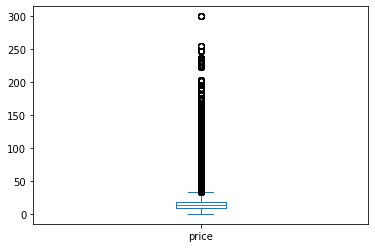

In [23]:
df_vente['price'].plot(kind='box')

In [24]:
mean = df_vente['price'].mean()
p5 = df_vente['price'].quantile(0.05)
p95 = df_vente['price'].quantile(0.95)

print(mean)
print(p5)
print(p95)

17.45477349072276
4.0
48.99


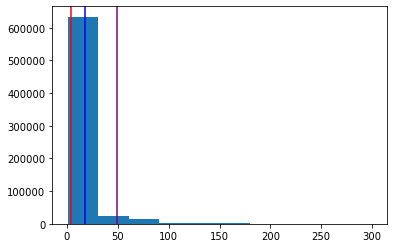

In [25]:
plt.hist(df_vente['price'])
plt.axvline(mean, color ="blue")
plt.axvline(p5, color ="red")
plt.axvline(p95, color ="purple")

In [26]:
price = df_vente['price']

# On écrit une fonction qui va lister les prix considérés comme outliers
outliers=[]
def detectOutlier(price):
    threshold=2
    mean = np.mean(price)
    std =np.std(price)
    
    for i in price:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# On observe
priceOutliers = detectOutlier(price)
print("Nombre d'outliers détectés => " + str(len(priceOutliers)))



Nombre d'outliers détectés => 28268


# Analyse des différents indicateurs de vente

In [27]:
ca_all = df_vente['price'].sum().round() 
ca_all

11853729.0

In [28]:
df_vente["Année_Mois"] = df_vente['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y/%m'))

In [29]:
df_vente["Calendrier"] = df_vente['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y/%m/%d'))
df_vente["Année"] = df_vente['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y'))
df_vente["Année_Mois"] = df_vente['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y/%m'))
df_vente["Jour"] = df_vente['date'].apply(lambda x: pd.Timestamp(x).strftime('%d'))
df_vente["Heure"] = df_vente['date'].apply(lambda x: pd.Timestamp(x).strftime('%H-%M'))


In [30]:
df_vente

,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth,Année_Mois,Calendrier,Année,Jour,Heure
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both,f,1991.0,2022/02,2022/02/20,2022,20,17-04
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,both,f,1991.0,2022/10,2022/10/20,2022,20,17-04
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,both,f,1991.0,2021/10,2021/10/09,2021,09,21-47
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,both,f,1991.0,2021/04,2021/04/28,2021,28,06-08
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,both,f,1991.0,2021/07,2021/07/15,2021,15,10-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679349,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,both,m,1997.0,2022/01,2022/01/28,2022,28,16-51
679350,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,both,m,2002.0,2021/07,2021/07/21,2021,21,09-11
679351,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,both,m,2002.0,2022/12,2022/12/21,2022,21,09-11
679352,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,both,m,2002.0,2022/10,2022/10/21,2022,21,09-11


In [31]:
mois = df_vente[["id_prod","Année_Mois","price"]].groupby(["Année_Mois"]).sum().round(2)
mois.head()

,price
Année_Mois,
2021/03,482440.61
2021/04,476109.30
2021/05,492943.47
2021/06,484088.56
2021/07,482835.40


In [32]:
mean_mois = df_vente[["id_prod","Année_Mois","price"]].groupby(["Année_Mois"]).mean().round(2)
# nous avons ici la moyenne mobile par mois

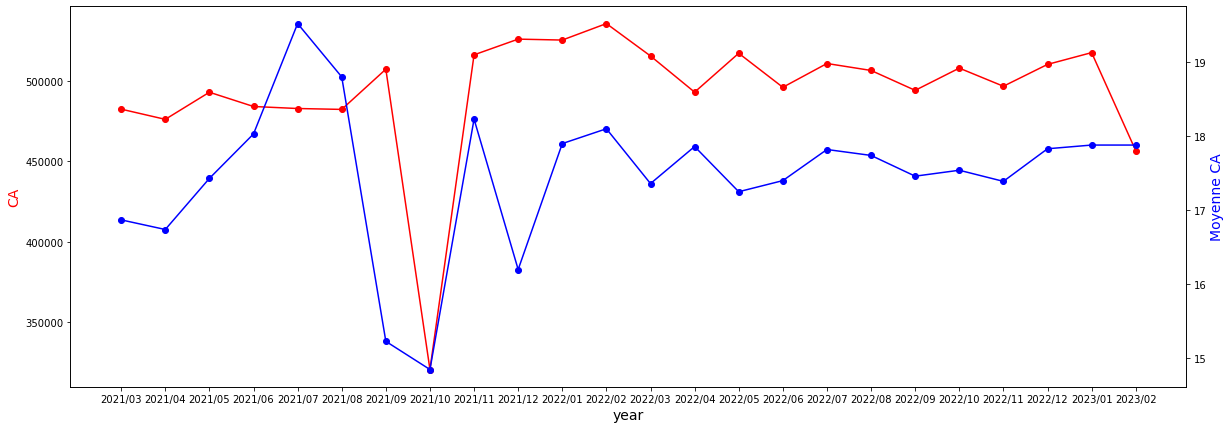

In [33]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(mois, color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("CA",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(mean_mois,color="blue",marker="o")
ax2.set_ylabel("Moyenne CA",color="blue",fontsize=14)
plt.gcf().set_size_inches(20, 7)
plt.show()

In [34]:
#Nous pouvons constater visuellement qu'en Octobre 2021 les résulats sont très differents des autres mois. 
#Creusons pour essayer de comprendre d'où vient le problème

df_vente2021_10 = df_vente.loc[df_vente['Année_Mois'] == "2021/10" ]

In [35]:
vente_oct_2021 = df_vente2021_10[["id_prod","Jour","price"]].groupby(["Jour"]).sum().round(2)
vente_oct_2021

,price
Jour,
01,17058.34
02,9182.13
03,8993.05
04,9279.68
05,9390.46
06,9490.69
07,8191.08
08,10207.35
09,9425.36


In [36]:
count_vente_oct_2021 = df_vente2021_10[["Jour","id_prod"]].groupby(["Jour"]).count().round(2)


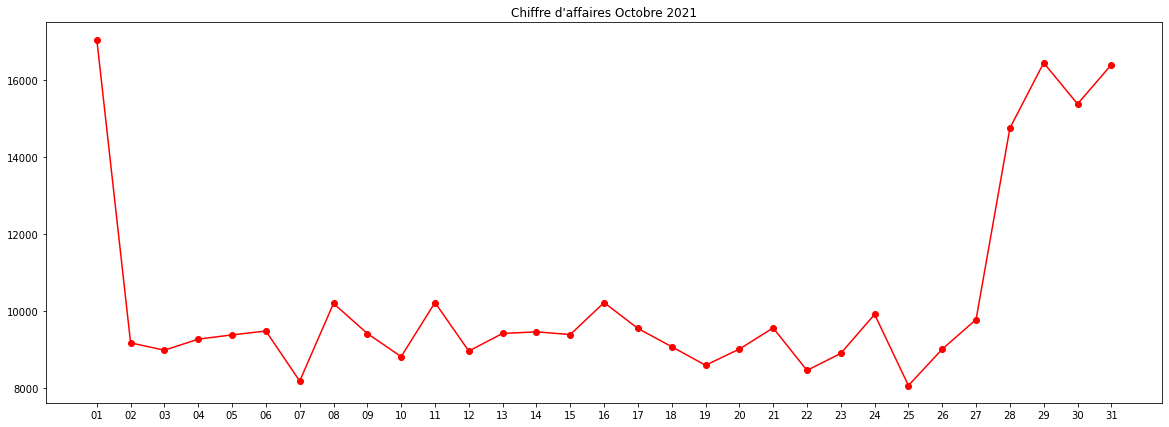

In [37]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
plt.title("Chiffre d'affaires Octobre 2021")
ax.plot(vente_oct_2021, color="red", marker="o")
plt.gcf().set_size_inches(20, 7)

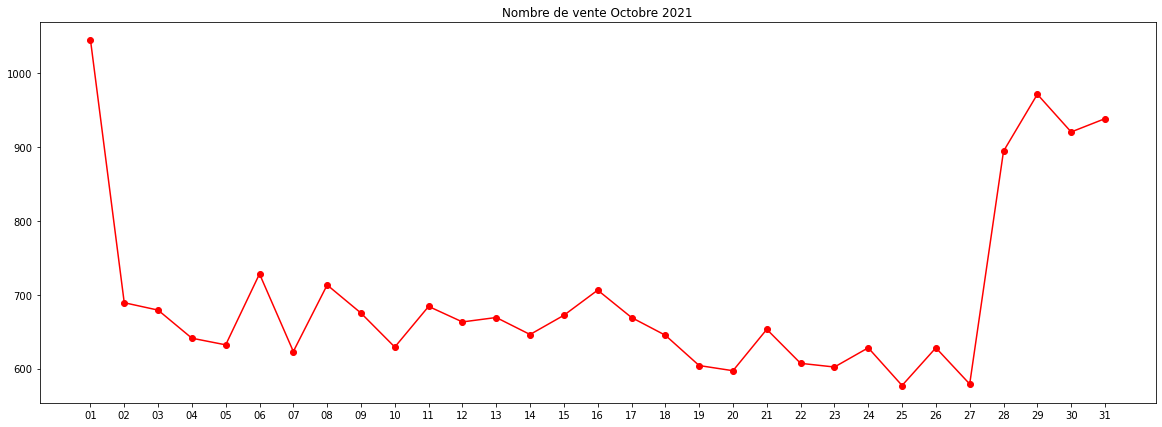

In [38]:

fig,ax = plt.subplots()
plt.title("Nombre de vente Octobre 2021")

ax.plot(count_vente_oct_2021, color="red", marker="o")
plt.gcf().set_size_inches(20, 7)

#### Classement des 10 produits les plus vendus et moins vendus

In [39]:
top_vente = df_vente[["id_prod","price"]].groupby(["id_prod"]).count().sort_values(["price"], ascending=False).head(10)

In [40]:
top_vente
#Nous avons ci-dessous les 10 produits les plus vendus

,price
id_prod,
1_369,2252
1_417,2189
1_414,2180
1_498,2128
1_425,2096
1_403,1960
1_412,1951
1_413,1945
1_406,1939


In [41]:
flop_vente = df_vente[["id_prod","price"]].groupby(["id_prod"]).count().sort_values(["price"]).head(10)
flop_vente
#Nous avons ci-dessous les 10 produits les moins vendus

,price
id_prod,
0_2245,0
0_807,1
0_886,1
0_549,1
0_1379,1
0_1151,1
0_1498,1
0_1633,1
0_1539,1


### Zoom sur les références

In [42]:
vente_categ = df_vente[["id_prod","categ"]].groupby(["categ"]).count()
vente_categ

,id_prod
categ,
0.0,415459
1.0,227169
2.0,36483


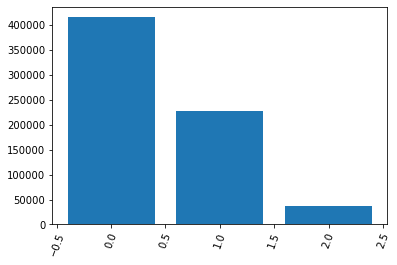

In [43]:
plt.bar(vente_categ.index, vente_categ['id_prod'])
plt.xticks(rotation=70) 
plt.show()

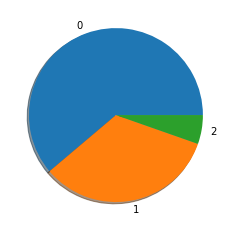

In [46]:
mylabels = ["0", "1", "2"]

plt.pie(vente_categ['id_prod'], labels=mylabels, shadow = True)

plt.show()

### Type de client, chiffre d'affaires et moyenne d'age par sex

Nous allons nous interesser sur l'age des clients, pour celà nous allons ajouter une colonne "age" dans notre dataframe principal

In [47]:
df_vente['age'] = 2023 - df_vente['birth']

In [48]:
df_vente.groupby("sex").agg({"sex": np.size, "price": np.sum, "age": np.mean})

,sex,price,age
sex,,,
f,338402,5859683.13,45.747977
m,340930,5994045.55,44.633890


Nombre de femmes : 338402 / CA : 5859368 / Age moyen : 46 ans
Nombre d hommes  : 340930 / CA : 5994045 / Age moyen : 45 ans           

In [90]:
profil2 = df_vente.groupby("age").agg({"sex": np.size, "price": np.sum})
profil2.columns = ['Nbr clients', 'CA']
profil2.head()

,Nbr clients,CA
age,,
19.0,15149,609013.69
20.0,4371,178195.78
21.0,4587,184177.35
22.0,4252,178497.70
23.0,4415,165007.98


#### Chiffre d'affaires par âge

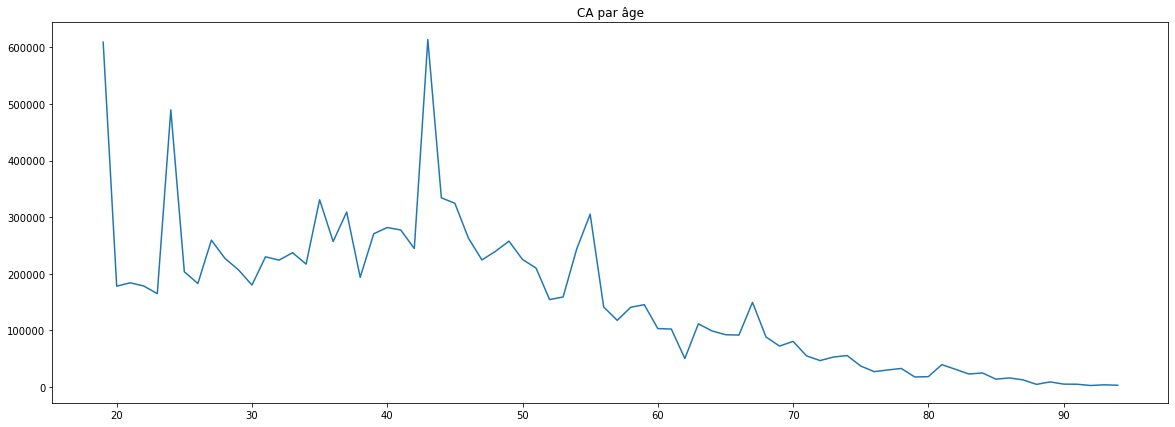

In [50]:
plt.plot(profil2['CA'])
plt.title("CA par âge")
plt.gcf().set_size_inches(20, 7)
plt.show().

### Courbe de Lorenz 

In [51]:
arr_price = df_vente[["client_id", "price"]].groupby(["client_id"]).sum().sort_values(['price'], ascending = True)
arr_price.head(5)

,price
client_id,
c_8351,6.31
c_8140,8.30
c_8114,9.98
c_240,11.06
c_4648,11.20


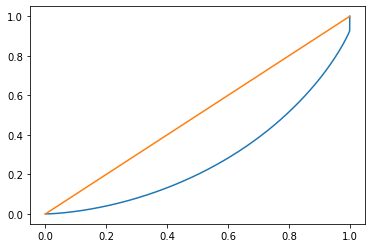

In [52]:
def lorenz(arr_price):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr_price.cumsum() / arr_price.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    scaled_prefix_sum = np.append([0], scaled_prefix_sum)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!


lorenz_curve = lorenz(arr_price)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

#### Indice de Gini

Coefficient de Gini: Il consiste à rapporter la mesure de l'aire comprise entre la courbe de Lorenz et la droite d'équirépartition. Plus le coefficient se rapproche de 1 plus la répartition est inégalitaire

In [53]:
#Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
aire_ss_courbe_age = lorenz_curve[:-1].sum()/len(lorenz_curve) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_ss_courbe_age
gini_age = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini_age))

L'indice de Gini est égal à 0.45


# Analyse univariée / bivariée

## Le lien entre le genre d’un client et les catégories des livres achetés

In [54]:
dataset_table = pd.crosstab(df_vente['sex'], df_vente['categ'])
dataset_table

categ,0.0,1.0,2.0
sex,,,
f,206103,114899,17283
m,209356,112270,19200


In [55]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [56]:
test=chi2_contingency(dataset_table)

print('statistique de test:', test[0])
print('p_value:', test[1])
print('degré de liberté:', test[2])


statistique de test: 147.11906816131497
p_value: 1.1310980597090762e-32
degré de liberté: 2


In [57]:
alpha = 0.05
critical_value=chi2.ppf(q=1-alpha,df=test[2])
print('critical_value:',critical_value)
# Table des valeurs critiques de la loi du chi-deux à 2 ddl à 5%

critical_value: 5.991464547107979


In [58]:
if test[0]>=critical_value:
    print("Rejet de H0, Il y a une relation entre les 2 variables")
else:
    print("Non rejet de H0, Il y a pas de relation entre les 2 variables")
    


Rejet de H0, Il y a une relation entre les 2 variables


## Lien entre l’âge des clients et le montant total des achats

In [59]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]

In [60]:
df_vente["categ_age"] = pd.cut(df_vente.age, range(0, 105, 10), right=False, labels=labels)

In [61]:
age_montant2 = df_vente[["price"]].groupby(df_vente["age"]).sum().reset_index()
age_montant2.head()
#Chiffre d'affaires par age

,age,price
0,19.0,609013.69
1,20.0,178195.78
2,21.0,184177.35
3,22.0,178497.70
4,23.0,165007.98


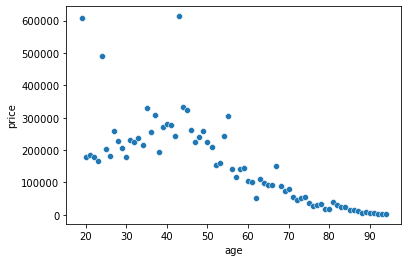

In [62]:
Age_CA=df_vente.loc[:,['age','price']]
Age_CA = Age_CA.groupby('age').sum()
Age_CA = Age_CA.sort_values(by=['age'])

sns.scatterplot(x=Age_CA.index,y='price',data=Age_CA);


In [63]:
from scipy.stats import pearsonr


In [64]:
pearsonr(Age_CA.index, Age_CA.price) 

#Ici la variable "x" âge et la variable "y" Chiffre d'affaires ont une forte relation négative 
#Nous pouvons conclure qu'il y a bien une correlation entre l'age et le CA.

(-0.7788810457116597, 1.1949535843460998e-16)

In [65]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


## Le lien entre l’âge des clients et la fréquence d'achat

In [66]:
f_achat = df_vente.groupby("age")[["session_id"]].nunique().reset_index()
f_achat['f'] = (f_achat['session_id'] / 24) / f_achat['session_id'].count()

<AxesSubplot:ylabel='f'>

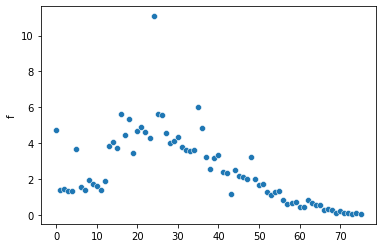

In [67]:
sns.scatterplot(x=f_achat.index,y='f',data=f_achat)


In [68]:
pearsonr(f_achat.index, f_achat.f) 

(-0.5528340228708238, 2.2391324252998667e-07)

In [69]:
#Pour vérifier le liens entre ces 2 variables nous utilisons un test ANOVA pour cela nous allons utiliser une variable quali
#cration de 3 tranches d'ages

In [70]:
bin_labels=labels=['0 à 15', '16 à 40 ans', '41 à 94 ans']
f_achat["categ_age"], bin_values = pd.cut(f_achat.age, bins=[0,15,40,94], labels=bin_labels,retbins=True)

In [71]:
f_achat

,age,session_id,f,categ_age
0,19.0,8594,4.711623,16 à 40 ans
1,20.0,2567,1.407346,16 à 40 ans
2,21.0,2604,1.427632,16 à 40 ans
3,22.0,2431,1.332785,16 à 40 ans
4,23.0,2421,1.327303,16 à 40 ans
...,...,...,...,...
71,90.0,234,0.128289,41 à 94 ans
72,91.0,206,0.112939,41 à 94 ans
73,92.0,96,0.052632,41 à 94 ans
74,93.0,146,0.080044,41 à 94 ans


In [72]:
import pingouin as pg

In [73]:
pg.anova(dv='f', between='categ_age', data=f_achat,
               detailed=True)
#Ici nous avons fait le test ANOVA pour verifier qu'il y a bien une liaison entre la frequence d'achat et l'age
#plus l'age est faible plus la fréquence est élevé

,Source,SS,DF,MS,F,p-unc,np2
0,categ_age,7.955807,1,7.955807,2.057419,0.155679,0.027051
1,Within,286.149619,74,3.866887,NaN,NaN,NaN


## Liens entre l'age des clients et la taille du panier moyen

In [74]:
# Dans un premier temps je vais calculer le panier moyen par âge

In [75]:
panier_client = df_vente.groupby(['age', 'session_id']).count().reset_index()
#1er temps: on regroupe par achat et par age / ensuite on fait une moyenne du nombre d'achat par sessions
panier_client = panier_client.groupby('age').mean().reset_index()
panier_client = panier_client[['age', 'id_prod']]
panier_client.tail()

,age,id_prod
71,90.0,1.397436
72,91.0,1.509709
73,92.0,1.770833
74,93.0,1.547945
75,94.0,1.500000


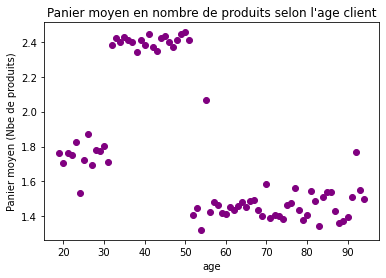

In [76]:
#Visualisation avec un scatterplot (âge client / taille panier moyen)
plt.plot(panier_client.age, panier_client.id_prod, 'o', color='purple')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')


plt.show()

In [77]:
#Subsets pour identifier les clusters clients 
customers_shop31 = panier_client[panier_client.age < 31]
customers_shop3050 = panier_client[(panier_client.age > 31) & (panier_client.age < 50)]
customers_shop50 = panier_client[panier_client.age > 51]

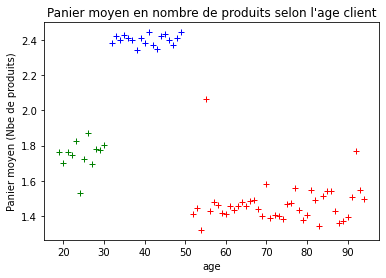

In [78]:
#Visualisation avec scatterplot selon les groupes d'individus identifiés
plt.plot(customers_shop31.age, customers_shop31.id_prod, '+', color='green')
plt.plot(customers_shop3050.age, customers_shop3050.id_prod, '+', color='blue')
plt.plot(customers_shop50.age, customers_shop50.id_prod, '+', color='red')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')


plt.show()

In [79]:
pearsonr(panier_client.age, panier_client.id_prod) 

(-0.5738876097284993, 5.97709624666632e-08)

Le test de corrélation démontre un certain lien (linéaire) entre l'âge du client et le panier moyen. -0.57 est à prendre on compte
De plus visuellement nous pouvons clairement constater une difference de panier moyen selon les tranches d'ages (couleurs)

In [81]:
bin_labels=labels=['0 à 31', '32 à 50 ans', '51 à 94 ans']
panier_client["age"], bin_values = pd.cut(panier_client.age, bins=[0,31,50,94], labels=bin_labels,retbins=True)

In [82]:
pg.anova(dv='id_prod', between='age', data=panier_client,
               detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,age,10.976931,2,5.488466,255.038449,1.154227e-33,0.874802
1,Within,1.570971,73,0.021520,NaN,NaN,NaN


## Analyse de la corrélation entre l'âge clients et la catégorie produits


In [83]:
age_categ = pd.crosstab(df_vente['categ_age'], df_vente['categ'])
age_categ

categ,0.0,1.0,2.0
categ_age,,,
10 - 19,3418,5719,6012
20 - 29,10994,20288,23051
30 - 39,119972,39905,4696
40 - 49,177018,54292,769
50 - 59,62257,53418,1056
60 - 69,24801,31757,550
70 - 79,11541,14610,219
80 - 89,4954,6458,122
90 - 99,504,722,8


In [84]:
age_categ = df_vente.groupby(['age', 'categ']).count().reset_index()
age_categ = age_categ[['age', 'categ', 'session_id']]
age_categ.head()

,age,categ,session_id
0,19.0,0.0,3418
1,19.0,1.0,5719
2,19.0,2.0,6012
3,20.0,0.0,909
4,20.0,1.0,1678


In [85]:
#Nous allons diviser la population en 3 catégories d'age pour mettre un test ANOVA

In [86]:
age_categ['age']= pd.cut(age_categ['age'], 10)
age_categ = age_categ.groupby(['age','categ']).sum().reset_index()
#modifier nom COLONNE SESSION_ID

In [87]:
age_categ.head(10)

,age,categ,session_id
0,"(18.925, 26.5]",0.0,10849
1,"(18.925, 26.5]",1.0,19687
2,"(18.925, 26.5]",2.0,22072
3,"(26.5, 34.0]",0.0,44964
4,"(26.5, 34.0]",1.0,22000
5,"(26.5, 34.0]",2.0,11331
6,"(34.0, 41.5]",0.0,110235
7,"(34.0, 41.5]",1.0,34301
8,"(34.0, 41.5]",2.0,527
9,"(41.5, 49.0]",0.0,145354


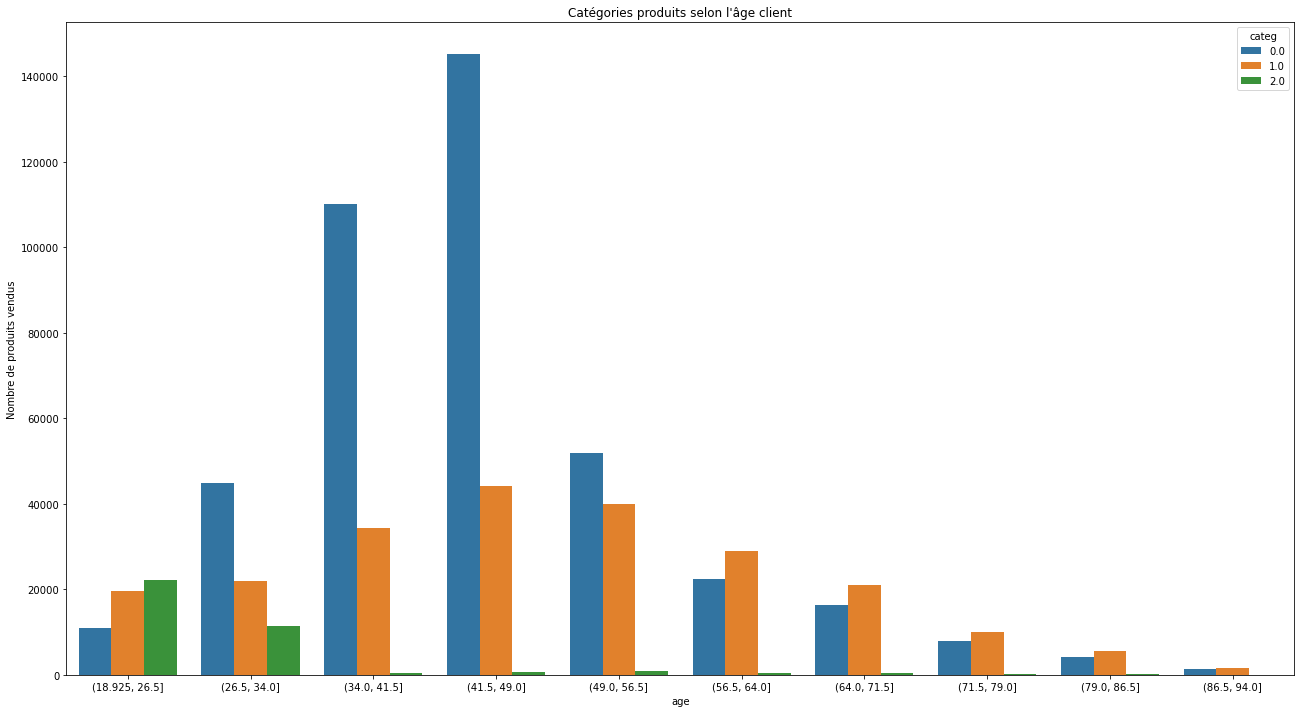

In [88]:
fig, ax = plt.subplots(figsize=(22, 12))
sns.barplot(x="age", y="session_id",hue="categ", data=age_categ)

ax.set_xlabel('age')
ax.set_ylabel('Nombre de produits vendus')
ax.set_title('Catégories produits selon l\'âge client')

plt.show()

In [89]:
pg.anova(dv='session_id', between='categ', data=age_categ,
               detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,categ,7.181236e+09,2,3.590618e+09,4.034649,0.029302,0.230096
1,Within,2.402853e+10,27,8.899455e+08,NaN,NaN,NaN


Le rapport de corrélation est proche de 0.23, ce qui précise le précédent graphique dans lequel une certaine corrélation entre les catégories et l'âge client. Il est perceptible de voir le lien que peut avoir une catégorie en fonction d'une tranche d'âges, avec par exemple un fort succès de la catégorie 0 pour les 34 / 49 ans, ou à l'inverse une clientèle plus âgée n'adhère quasiment pas à cette catégorie, etc..